In [1]:
using CSV

In [2]:
using DataFrames

In [3]:
using Statistics

In [4]:
 using StatsBase

In [5]:
using StatsPlots

In [6]:
using ScikitLearn

In [7]:
using ScikitLearn: fit!,predict

In [8]:
using Plots

In [9]:
df = CSV.read("Admission_Predict.csv")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,337,118,4,4.5,4.5,9.65
2,2,324,107,4,4.0,4.5,8.87
3,3,316,104,3,3.0,3.5,8.0
4,4,322,110,3,3.5,2.5,8.67
5,5,314,103,2,2.0,3.0,8.21
6,6,330,115,5,4.5,3.0,9.34
7,7,321,109,3,3.0,4.0,8.2
8,8,308,101,2,3.0,4.0,7.9
9,9,302,102,1,2.0,1.5,8.0


In [10]:
df2 = CSV.read("Admission_Predict_Ver1.1.csv")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,337,118,4,4.5,4.5,9.65
2,2,324,107,4,4.0,4.5,8.87
3,3,316,104,3,3.0,3.5,8.0
4,4,322,110,3,3.5,2.5,8.67
5,5,314,103,2,2.0,3.0,8.21
6,6,330,115,5,4.5,3.0,9.34
7,7,321,109,3,3.0,4.0,8.2
8,8,308,101,2,3.0,4.0,7.9
9,9,302,102,1,2.0,1.5,8.0


In [11]:
first(df,5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,337,118,4,4.5,4.5,9.65
2,2,324,107,4,4.0,4.5,8.87
3,3,316,104,3,3.0,3.5,8.0
4,4,322,110,3,3.5,2.5,8.67
5,5,314,103,2,2.0,3.0,8.21


In [12]:
last(df,5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,396,324,110,3,3.5,3.5,9.04
2,397,325,107,3,3.0,3.5,9.11
3,398,330,116,4,5.0,4.5,9.45
4,399,312,103,3,3.5,4.0,8.78
5,400,333,117,4,5.0,4.0,9.66


In [13]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,Serial No.,200.5,1,200.5,400,,,Int64
2,GRE Score,316.808,290,317.0,340,,,Int64
3,TOEFL Score,107.41,92,107.0,120,,,Int64
4,University Rating,3.0875,1,3.0,5,,,Int64
5,SOP,3.4,1.0,3.5,5.0,,,Float64
6,LOR,3.4525,1.0,3.5,5.0,,,Float64
7,CGPA,8.59893,6.8,8.61,9.92,,,Float64
8,Research,0.5475,0,1.0,1,,,Int64
9,Chance of Admit,0.72435,0.34,0.73,0.97,,,Float64


In [14]:
size(df)

(400, 9)

In [15]:
size(df2)

(500, 9)

In [16]:
df = vcat(df,df2)    # to concatenate to dataFrames

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,337,118,4,4.5,4.5,9.65
2,2,324,107,4,4.0,4.5,8.87
3,3,316,104,3,3.0,3.5,8.0
4,4,322,110,3,3.5,2.5,8.67
5,5,314,103,2,2.0,3.0,8.21
6,6,330,115,5,4.5,3.0,9.34
7,7,321,109,3,3.0,4.0,8.2
8,8,308,101,2,3.0,4.0,7.9
9,9,302,102,1,2.0,1.5,8.0


In [17]:
first(df,5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,337,118,4,4.5,4.5,9.65
2,2,324,107,4,4.0,4.5,8.87
3,3,316,104,3,3.0,3.5,8.0
4,4,322,110,3,3.5,2.5,8.67
5,5,314,103,2,2.0,3.0,8.21


In [18]:
size(df)

(900, 9)

In [19]:
showall(describe(df))

┌ Warning: `showall(df::AbstractDataFrame, allcols::Bool = true)` is deprecated, use `show(df, allrows = true, allcols = allcols)` instead.
│   caller = showall(::DataFrame) at deprecated.jl:66
└ @ DataFrames .\deprecated.jl:66


9×8 DataFrame
│ Row │ variable          │ mean     │ min  │ median  │ max  │ nunique │
│     │ Symbol            │ Float64  │ Real │ Float64 │ Real │ Nothing │
├─────┼───────────────────┼──────────┼──────┼─────────┼──────┼─────────┤
│ 1   │ Serial No.        │ 228.278  │ 1    │ 225.5   │ 500  │         │
│ 2   │ GRE Score         │ 316.621  │ 290  │ 317.0   │ 340  │         │
│ 3   │ TOEFL Score       │ 107.289  │ 92   │ 107.0   │ 120  │         │
│ 4   │ University Rating │ 3.10222  │ 1    │ 3.0     │ 5    │         │
│ 5   │ SOP               │ 3.38556  │ 1.0  │ 3.5     │ 5.0  │         │
│ 6   │ LOR               │ 3.47     │ 1.0  │ 3.5     │ 5.0  │         │
│ 7   │ CGPA              │ 8.58643  │ 6.8  │ 8.57    │ 9.92 │         │
│ 8   │ Research          │ 0.554444 │ 0    │ 1.0     │ 1    │         │
│ 9   │ Chance of Admit   │ 0.7229   │ 0.34 │ 0.73    │ 0.97 │         │

│ Row │ nmissing │ eltype   │
│     │ Nothing  │ DataType │
├─────┼──────────┼──────────┤
│ 1   │          │ 

In [20]:
names(df)

9-element Array{String,1}:
 "Serial No."
 "GRE Score"
 "TOEFL Score"
 "University Rating"
 "SOP"
 "LOR "
 "CGPA"
 "Research"
 "Chance of Admit "

In [21]:
countmap(df["University Rating"])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[21]:1
└ @ Core In[21]:1


Dict{Int64,Int64} with 5 entries:
  4 => 179
  2 => 233
  3 => 295
  5 => 133
  1 => 60

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[22]:1
└ @ Core In[22]:1


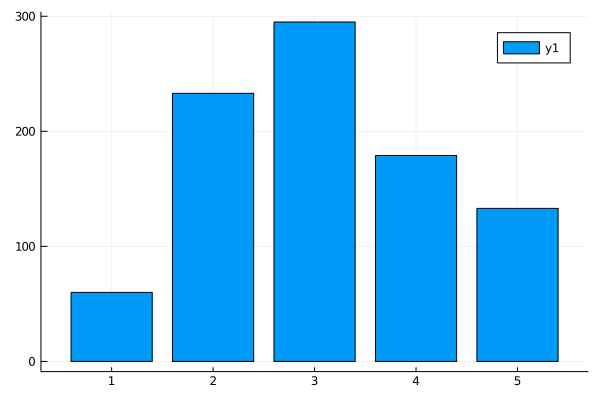

In [22]:
bar(countmap(df["University Rating"]))

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[23]:1
└ @ Core In[23]:1


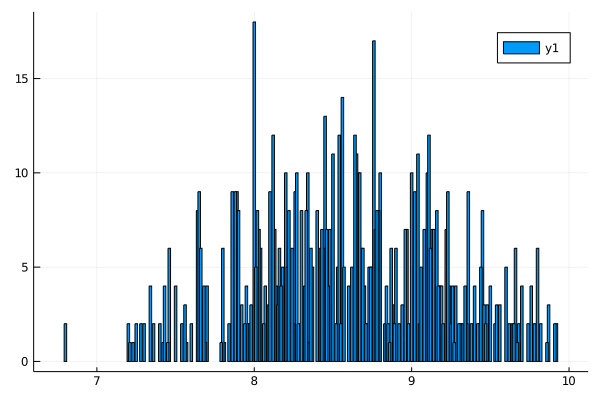

In [23]:
bar(countmap(df["CGPA"]))


In [24]:
countmap(df["LOR "])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[24]:1
└ @ Core In[24]:1


Dict{Float64,Int64} with 9 entries:
  4.0 => 171
  2.0 => 84
  3.0 => 184
  2.5 => 89
  1.5 => 18
  3.5 => 159
  4.5 => 108
  5.0 => 85
  1.0 => 2

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[25]:1
└ @ Core In[25]:1


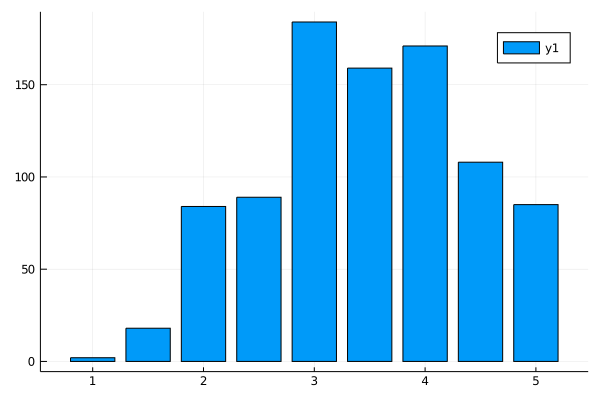

In [25]:
bar(countmap(df["LOR "]))

In [26]:
countmap(df["SOP"])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[26]:1
└ @ Core In[26]:1


Dict{Float64,Int64} with 9 entries:
  4.0 => 159
  2.0 => 76
  3.0 => 144
  2.5 => 111
  1.5 => 45
  3.5 => 158
  4.5 => 116
  5.0 => 79
  1.0 => 12

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[27]:1
└ @ Core In[27]:1


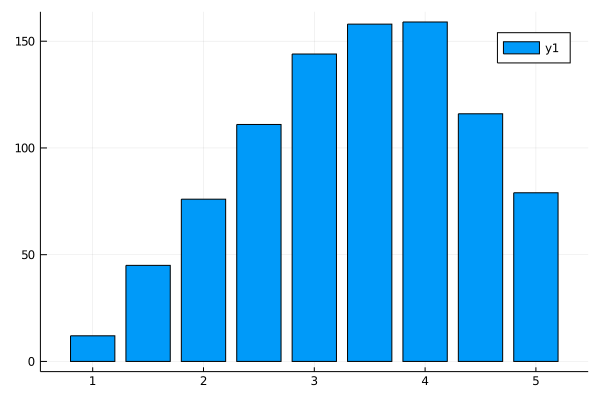

In [27]:
bar(countmap(df["SOP"]))

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[28]:1
└ @ Core In[28]:1


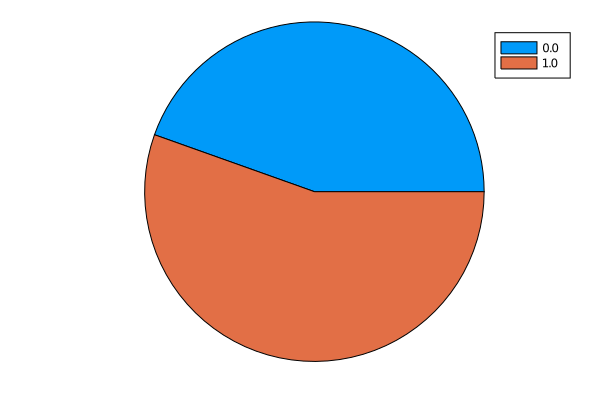

In [28]:
pie(countmap(df["Research"]))

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[29]:1
└ @ Core In[29]:1


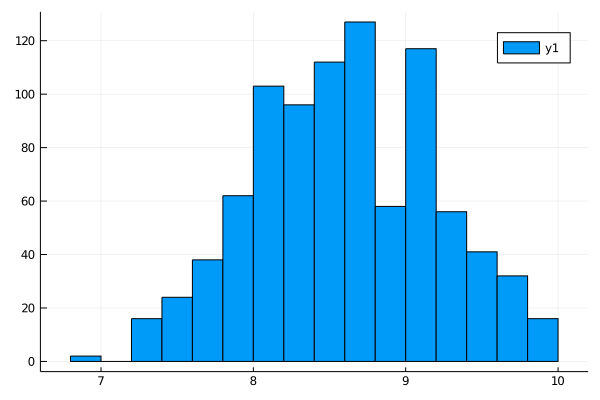

In [29]:
histogram(df["CGPA"])

In [30]:
pyplot()

Plots.PyPlotBackend()

┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[31]:1
└ @ Core In[31]:1


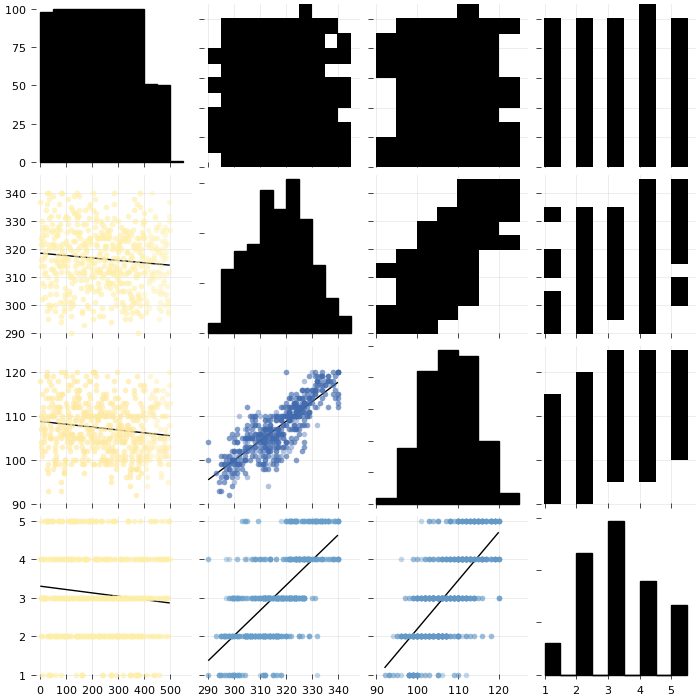

In [31]:
corrplot(Array(df[1:4]),size=(700,700),bins=10)

In [32]:
rename!(df, Symbol("Chance of Admit ") => :Chance_of_Admit )

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,337,118,4,4.5,4.5,9.65
2,2,324,107,4,4.0,4.5,8.87
3,3,316,104,3,3.0,3.5,8.0
4,4,322,110,3,3.5,2.5,8.67
5,5,314,103,2,2.0,3.0,8.21
6,6,330,115,5,4.5,3.0,9.34
7,7,321,109,3,3.0,4.0,8.2
8,8,308,101,2,3.0,4.0,7.9
9,9,302,102,1,2.0,1.5,8.0


In [33]:
y = df["Chance_of_Admit"]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[33]:1
└ @ Core In[33]:1


900-element Array{Float64,1}:
 0.92
 0.76
 0.72
 0.8
 0.65
 0.9
 0.75
 0.68
 0.5
 0.45
 0.52
 0.84
 0.78
 ⋮
 0.76
 0.65
 0.67
 0.54
 0.53
 0.62
 0.68
 0.87
 0.96
 0.93
 0.73
 0.84

In [34]:
X=select!(df,Not(:Chance_of_Admit))

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,337,118,4,4.5,4.5,9.65
2,2,324,107,4,4.0,4.5,8.87
3,3,316,104,3,3.0,3.5,8.0
4,4,322,110,3,3.5,2.5,8.67
5,5,314,103,2,2.0,3.0,8.21
6,6,330,115,5,4.5,3.0,9.34
7,7,321,109,3,3.0,4.0,8.2
8,8,308,101,2,3.0,4.0,7.9
9,9,302,102,1,2.0,1.5,8.0


In [35]:
X= convert(Array,X)

900×8 Array{Float64,2}:
   1.0  337.0  118.0  4.0  4.5  4.5  9.65  1.0
   2.0  324.0  107.0  4.0  4.0  4.5  8.87  1.0
   3.0  316.0  104.0  3.0  3.0  3.5  8.0   1.0
   4.0  322.0  110.0  3.0  3.5  2.5  8.67  1.0
   5.0  314.0  103.0  2.0  2.0  3.0  8.21  0.0
   6.0  330.0  115.0  5.0  4.5  3.0  9.34  1.0
   7.0  321.0  109.0  3.0  3.0  4.0  8.2   1.0
   8.0  308.0  101.0  2.0  3.0  4.0  7.9   0.0
   9.0  302.0  102.0  1.0  2.0  1.5  8.0   0.0
  10.0  323.0  108.0  3.0  3.5  3.0  8.6   0.0
  11.0  325.0  106.0  3.0  3.5  4.0  8.4   1.0
  12.0  327.0  111.0  4.0  4.0  4.5  9.0   1.0
  13.0  328.0  112.0  4.0  4.0  4.5  9.1   1.0
   ⋮                            ⋮          
 489.0  322.0  112.0  3.0  3.0  4.0  8.62  1.0
 490.0  302.0  110.0  3.0  4.0  4.5  8.5   0.0
 491.0  307.0  105.0  2.0  2.5  4.5  8.12  1.0
 492.0  297.0   99.0  4.0  3.0  3.5  7.81  0.0
 493.0  298.0  101.0  4.0  2.5  4.5  7.69  1.0
 494.0  300.0   95.0  2.0  3.0  1.5  8.22  1.0
 495.0  301.0   99.0  3.0  2.5  2.0  8.

In [36]:
y = convert(Array,y)

900-element Array{Float64,1}:
 0.92
 0.76
 0.72
 0.8
 0.65
 0.9
 0.75
 0.68
 0.5
 0.45
 0.52
 0.84
 0.78
 ⋮
 0.76
 0.65
 0.67
 0.54
 0.53
 0.62
 0.68
 0.87
 0.96
 0.93
 0.73
 0.84

In [37]:
@sk_import model_selection: train_test_split

┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore C:\Users\Rahul\.julia\packages\ScikitLearn\Kn82b\src\Skcore.jl:169


PyObject <function train_test_split at 0x00000000626103A8>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

4-element Array{Array{Float64,N} where N,1}:
 [425.0 325.0 … 9.46 1.0; 339.0 323.0 … 8.74 1.0; … ; 258.0 324.0 … 8.64 1.0; 88.0 317.0 … 8.28 0.0]
 [456.0 305.0 … 7.64 0.0; 496.0 332.0 … 9.02 1.0; … ; 152.0 332.0 … 9.28 1.0; 302.0 319.0 … 8.76 0.0]
 [0.91, 0.81, 0.86, 0.59, 0.79, 0.84, 0.91, 0.48, 0.71, 0.57  …  0.59, 0.77, 0.89, 0.7, 0.74, 0.88, 0.6, 0.71, 0.78, 0.66]
 [0.59, 0.87, 0.72, 0.8, 0.91, 0.44, 0.8, 0.64, 0.69, 0.62  …  0.78, 0.78, 0.79, 0.69, 0.94, 0.64, 0.81, 0.64, 0.94, 0.66]

<h2> Decision Tree

In [43]:
@sk_import tree:DecisionTreeRegressor

PyObject <class 'sklearn.tree._classes.DecisionTreeRegressor'>

In [44]:
tree= DecisionTreeRegressor()

PyObject DecisionTreeRegressor()

In [45]:
fit!(tree,X_train,y_train)

PyObject DecisionTreeRegressor()

In [46]:
pred = predict(tree,X_test)

225-element Array{Float64,1}:
 0.56
 0.79
 0.72
 0.8000000000000002
 0.91
 0.44
 0.8
 0.64
 0.69
 0.61
 0.66
 0.8
 0.73
 ⋮
 0.64
 0.76
 0.78
 0.65
 0.79
 0.69
 0.9399999999999997
 0.64
 0.81
 0.63
 0.94
 0.66

In [56]:
@sk_import metrics:mean_squared_error

PyObject <function mean_squared_error at 0x0000000062804CA8>

In [58]:
acc = sqrt(mean_squared_error(y_test,pred))

0.03787699389691144

<h2> Random Forest 

In [60]:
@sk_import ensemble:RandomForestRegressor

PyObject <class 'sklearn.ensemble._forest.RandomForestRegressor'>

In [61]:
random = RandomForestRegressor()

PyObject RandomForestRegressor()

In [62]:
fit!(random,X_train,y_train)

PyObject RandomForestRegressor()

In [63]:
ran_pred = predict(random,X_test)

225-element Array{Float64,1}:
 0.4982000000000003
 0.8325000000000002
 0.6900999999999995
 0.8043999999999992
 0.9140999999999986
 0.4509999999999998
 0.7662999999999991
 0.6286000000000004
 0.6771999999999992
 0.6347999999999999
 0.7191999999999992
 0.796599999999999
 0.7343999999999995
 ⋮
 0.6617000000000004
 0.7383000000000003
 0.8114000000000005
 0.6339999999999999
 0.7717000000000007
 0.6892999999999994
 0.9342999999999998
 0.6519000000000001
 0.8228000000000005
 0.6274000000000002
 0.9290999999999989
 0.6980999999999988

In [64]:
ran_acc = sqrt(mean_squared_error(y_test,ran_pred))

0.03729699481489388